In [ ]:
! pip install opendatasets

In [ ]:
import numpy as np
import pandas as pd
import opendatasets as od
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
od.download("https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset")

Skipping, found downloaded files in "./sms-spam-collection-dataset" (use force=True to force download)


In [ ]:
dataset = pd.read_csv("/content/sms-spam-collection-dataset/spam.csv",delimiter=',',encoding='latin-1')

In [ ]:
dataset.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
dataset.shape

(5572, 5)

In [ ]:
dataset.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
dataset.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [ ]:
dataset.duplicated().sum()

403

In [ ]:
dataset=dataset.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'], axis=1)

In [ ]:
dataset=dataset.drop_duplicates(keep='first')

In [ ]:
dataset.describe()

,v1,v2
count,5169,5169
unique,2,5169
top,ham,"Go until jurong point, crazy.. Available only ..."
freq,4516,1


In [ ]:
dataset['v1'].value_counts()

ham     4516
spam     653
Name: v1, dtype: int64

<Axes: xlabel='v1', ylabel='count'>

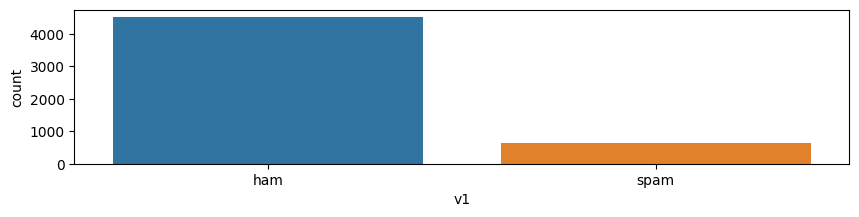

In [ ]:
plt.figure(figsize=(10,2))
sns.countplot(dataset,x='v1')

In [ ]:
dataset['v1'].replace({'spam': 0, 'ham': 1}, inplace=True)

In [ ]:
x = dataset['v2']
y = dataset['v1']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [ ]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((3618,), (1551,), (3618,), (1551,))

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords
from collections import Counter

In [ ]:
vect=TfidfVectorizer(min_df=1, stop_words='english',lowercase=True)

In [ ]:
x_train_vect=vect.fit_transform(x_train)
x_test_vect=vect.transform(x_test)

In [ ]:
y_train=y_train.astype('int')
y_test=y_test.astype('int')

In [ ]:
x_train_vect.shape,x_test_vect.shape,y_train.shape,y_test.shape

((3618, 6816), (1551, 6816), (3618,), (1551,))

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
model=MultinomialNB()

In [ ]:
model = model.fit(x_train_vect,y_train)

In [ ]:
predict=model.predict(x_test_vect)

In [ ]:
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

In [ ]:
print("Classification Report:")
print(classification_report(y_test, predict))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.71      0.83       220
           1       0.95      1.00      0.98      1331

    accuracy                           0.96      1551
   macro avg       0.98      0.86      0.90      1551
weighted avg       0.96      0.96      0.96      1551



In [ ]:
print("ROC-AUC Score:", roc_auc_score(y_test, predict))

ROC-AUC Score: 0.8568181818181818


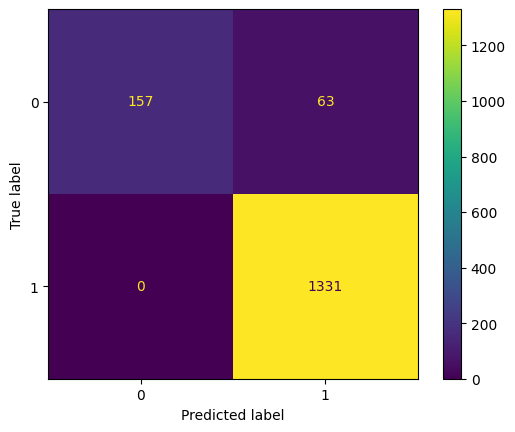

In [ ]:
cmd=ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,predict))
cmd.plot()

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model_1 = LogisticRegression(max_iter=1000)

In [ ]:
model_1.fit(x_train_vect,y_train)

LogisticRegression(max_iter=1000)

In [ ]:
predict_1=model_1.predict(x_test_vect)

In [ ]:
print("Classification Report:")
print(classification_report(y_test, predict_1))

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.69      0.81       220
           1       0.95      1.00      0.97      1331

    accuracy                           0.95      1551
   macro avg       0.97      0.84      0.89      1551
weighted avg       0.96      0.95      0.95      1551



In [ ]:
print("ROC-AUC Score:", roc_auc_score(y_test, predict_1))

ROC-AUC Score: 0.8447032306536439


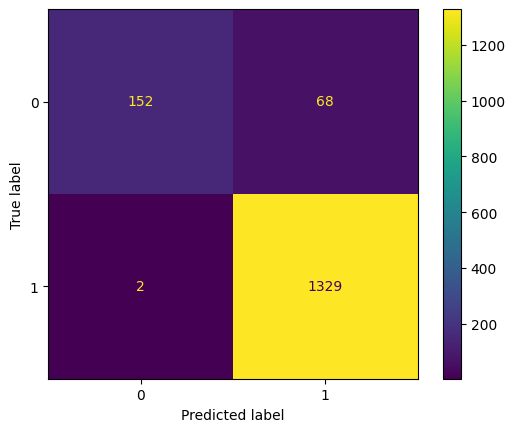

In [ ]:
cmd=ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,predict_1))
cmd.plot()

In [ ]:
from sklearn.svm import SVC

In [ ]:
model_2 = SVC(kernel='linear')

In [ ]:
model_2.fit(x_train_vect, y_train)

SVC(kernel='linear')

In [ ]:
predict_2=model_2.predict(x_test_vect)

In [ ]:
print("Classification Report:")
print(classification_report(y_test, predict_2))

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.88      0.92       220
           1       0.98      1.00      0.99      1331

    accuracy                           0.98      1551
   macro avg       0.98      0.94      0.96      1551
weighted avg       0.98      0.98      0.98      1551



In [ ]:
print("ROC-AUC Score:", roc_auc_score(y_test, predict_2))

ROC-AUC Score: 0.9367580766341097


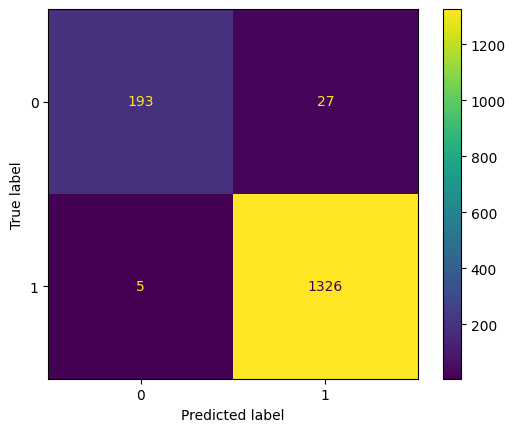

In [ ]:
cmd=ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,predict_2))
cmd.plot()